In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from itertools import combinations

In [10]:
df = pd.read_csv('../Data/Example/S8_add_d_gene.tsv', sep='\t')
df.head(100)

,sequence_id,duplicate_count,frequency,sequence,sequence_aa,sequence_alignment,germline_alignment,v_call,d_call,j_call,...,cdr1_aa,cdr2_aa,cdr3_aa,rev_comp,productive,v_cigar,d_cigar,j_cigar,v_alignment_length,v_alignment_mutation
0,Seq_1,1392,0.010871,TGCAGCCTCTGGATTCACCTTAAGTAGCCATTGGATGACCTGGGTC...,AASGFTLSSHWMTWVRQAPGKGPEWVATIKEDGSDKYYVDSVKGRF...,TGCAGCCTCTGGATTCACCTTAAGTAGCCATTGGATGACCTGGGTC...,TGCAGCCTCTGGATTCACCTTAAGTAGCCATTGGATGACCTGGGTC...,IGHV3-7*01,IGHD3-16*01,IGHJ6*01,...,GFTLSSHW,IKEDGSDK,ARDGGGGGLDA,F,T,21=1X6=1X9=1X29=1X14=1X7=1X13=1X29=1X95=,6=,4=1X6=1X6=1X27=,231,8
1,Seq_2,1218,0.009512,TGCAGTGTCTGGATTCAACCTCAGTGACTATAGTCTGAACTGGGTC...,AVSGFNLSDYSLNWVRQAPGKGLEWVSYLSWSGTRILYADSVKGRF...,TGCAGTGTCTGGATTCAACCTCAGTGACTATAGTCTGAACTGGGTC...,TGCAGTGTCTGGATTCAACCTCAGTGACTATAGTCTGAACTGGGTC...,IGHV3-48*02,IGHD5-12*01,IGHJ6*01,...,GFNLSDYS,LSWSGTRI,TRDSGYGYGMDV,F,T,5=2X10=1X1=1X5=2X6=2X25=1X23=2X1=3X1=1X1=1X3=1...,7=,3=1X2=1X14=1X27=,231,32
2,Seq_3,1120,0.008746,TGCAGCCTCTGGATTCACCTTCAGTAGTTATTCTATGCACTGGGTC...,AASGFTFSSYSMHWVRQAPGKGLECVAVISYDGINKYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTAGTTATTCTATGCACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGTTATTCTATGCACTGGGTC...,IGHV3-30-3*01,IGHD5-12*01,IGHJ4*02,...,GFTFSSYS,ISYDGINK,ARDGLGYNDIDY,F,T,27=1X3=1X43=1X5=1X5=1X11=1X1=1X6=1X33=1X30=1X57=,7=,41=,231,10
3,Seq_4,929,0.007255,TGCAGCCTCTGGGTTCACCTTCAGTGGCTCTACTTTGCACTGGGTC...,AASGFTFSGSTLHWVRQASGKGLEWVGRIRTKANSYATAYAASVTG...,TGCAGCCTCTGGGTTCACCTTCAGTGGCTCTACTTTGCACTGGGTC...,TGCAGCCTCTGGGTTCACCTTCAGTGGCTCTACTTTGCACTGGGTC...,IGHV3-73*01,IGHD6-19*01,IGHJ4*02,...,GFTFSGST,IRTKANSYAT,TERGISGW,F,T,31=1X2=1X57=1X41=1X49=1X40=1X5=,10=,33=,231,6
4,Seq_5,823,0.006427,TGGAGCCTCTGGATTCACCTTCAGTAGTTATAACCTGAACTGGGTC...,GASGFTFSSYNLNWVRQAPGKGLEWVSSISSSSSYIYYADSVKGRF...,TGGAGCCTCTGGATTCACCTTCAGTAGTTATAACCTGAACTGGGTC...,TGGAGCCTCTGGATTCACCTTCAGTAGTTATAACCTGAACTGGGTC...,IGHV3-21*01,IGHD3-3*01,IGHJ6*01,...,GFTFSSYN,ISSSSSYI,ARDQQGRFWSDFHTLYYDFGMDV,F,T,2=1X24=1X4=1X1=1X76=1X8=1X48=1X43=1X12=1X4=,10=,7=1X3=1X9=1X8=1X27=,231,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Seq_96,186,0.001453,GCTTCTGGATACACCTTCATAAGCTATGCTATGAATTGGGTGCGAC...,ASGYTFISYAMNWVRQAPGQGLEWMGWINTNTGNPTYAQGFTGRFV...,GCTTCTGGATACACCTTCATAAGCTATGCTATGAATTGGGTGCGAC...,GCTTCTGGATACACCTTCATAAGCTATGCTATGAATTGGGTGCGAC...,IGHV7-4-1*02,IGHD6-13*01,IGHJ2*01,...,GYTFISYA,INTNTGNP,ARTIAAADRKYFDL,F,T,19=2X163=1X39=,14=,45=,224,3
96,Seq_97,186,0.001453,TGCAGCCTCTGGATTCACCATCAGTGACCACTATATGGACTGGGTC...,AASGFTISDHYMDWVRQAPGKGLEWVGRTDNKAKNFATHYAASVRG...,TGCAGCCTCTGGATTCACCATCAGTGACCACTATATGGACTGGGTC...,TGCAGCCTCTGGATTCACCATCAGTGACCACTATATGGACTGGGTC...,IGHV3-72*01,IGHD6-6*01,IGHJ4*01,...,GFTISDHY,TDNKAKNFAT,VRHPTSGASDD,F,T,19=1X13=1X54=3X11=1X1=1X2=1X1=1X5=1X1=1X16=1X1...,5=,3=1X10=1X24=,235,20
97,Seq_98,185,0.001445,TGCAGCGTCTGGATTCACCCTCAGTAACTATGCCATGCACTGGGTC...,AASGFTLSNYAMHWVRQAPGKGLEWVAVMWYDGSKTYYADSANGRF...,TGCAGCGTCTGGATTCACCCTCAGTAACTATGCCATGCACTGGGTC...,TGCAGCGTCTGGATTCACCCTCAGTAACTATGCCATGCACTGGGTC...,IGHV3-33*01,IGHD4-17*01,IGHJ2*01,...,GFTLSNYA,MWYDGSKT,ARTPPTDWYFDL,F,T,19=1X6=1X5=1X54=1X17=1X1=1X17=1X3=1X39=1X22=1X...,6=,34=1X4=1X10=,228,12
98,Seq_99,185,0.001445,GCCTCTGGATACATCTTCACTAACTATGGTGTGAATTGGGTGCGAC...,ASGYIFTNYGVNWVRQAPGRGLEWMGWINTNTGSPTYAPDFRGRFV...,GCCTCTGGATACATCTTCACTAACTATGGTGTGAATTGGGTGCGAC...,GCCTCTGGATACATCTTCACTAACTATGGTGTGAATTGGGTGCGAC...,IGHV7-4-1*04,IGHD7-27*01,IGHJ4*02,...,GYIFTNYG,INTNTGSP,ARAANWAFGRFFED,F,T,2=1X10=1X8=1X5=1X1=1X27=1X3=1X14=1X22=1X14=1X2...,7=,6=2X14=1X1=1X18=,226,25


In [3]:
new_df = df[['sequence_id', 'duplicate_count', 'frequency', 'v_call', 'j_call', 'c_call', 'cdr3_aa', 'v_alignment_length', 'v_alignment_mutation']]

cdr3 = new_df['cdr3_aa']
v_call = new_df['v_call']
j_call = new_df['j_call']
c_call = new_df['c_call']


In [7]:

for i in range (len(v_call)):
    for j in range (len(v_call[i])):
        if v_call[i][j]=='*':
            v_call[i] = v_call[i][:j].copy()
            break

for i in range (len(j_call)):
    for j in range (len(j_call[i])):
        if j_call[i][j]=='*':
            j_call[i] = j_call[i][:j].copy()
            break

for i in range (len(c_call)):
    for j in range (len(c_call[i])):
        if c_call[i][j]=='*':
            c_call[i] = c_call[i][:j].copy()
            break


In [6]:
new_df

,sequence_id,duplicate_count,frequency,v_call,j_call,c_call,cdr3_aa,v_alignment_length,v_alignment_mutation
0,Seq_1,1392,0.010871,IGHV3-7,IGHJ6,IGHA2,ARDGGGGGLDA,231,8
1,Seq_2,1218,0.009512,IGHV3-48,IGHJ6,IGHA2,TRDSGYGYGMDV,231,32
2,Seq_3,1120,0.008746,IGHV3-30-3,IGHJ4,IGHA2,ARDGLGYNDIDY,231,10
3,Seq_4,929,0.007255,IGHV3-73,IGHJ4,IGHG1,TERGISGW,231,6
4,Seq_5,823,0.006427,IGHV3-21,IGHJ6,IGHA1,ARDQQGRFWSDFHTLYYDFGMDV,231,9
...,...,...,...,...,...,...,...,...,...
9127,Seq_9128,1,0.000008,IGHV5-51,IGHJ5,IGHM,ASSNYNWFDP,225,13
9128,Seq_9129,1,0.000008,IGHV3-9,IGHJ4,IGHG2,SKDIGNGRPNHYDSSGFLDS,233,25
9129,Seq_9130,1,0.000008,IGHV3-15,IGHJ6,IGHG1,ATDPFVLLWFGEPRSYGVDV,237,10
9130,Seq_9131,1,0.000008,IGHV1-58,IGHJ6,IGHA1,AAVSPQRLAMGVYGMDV,225,37


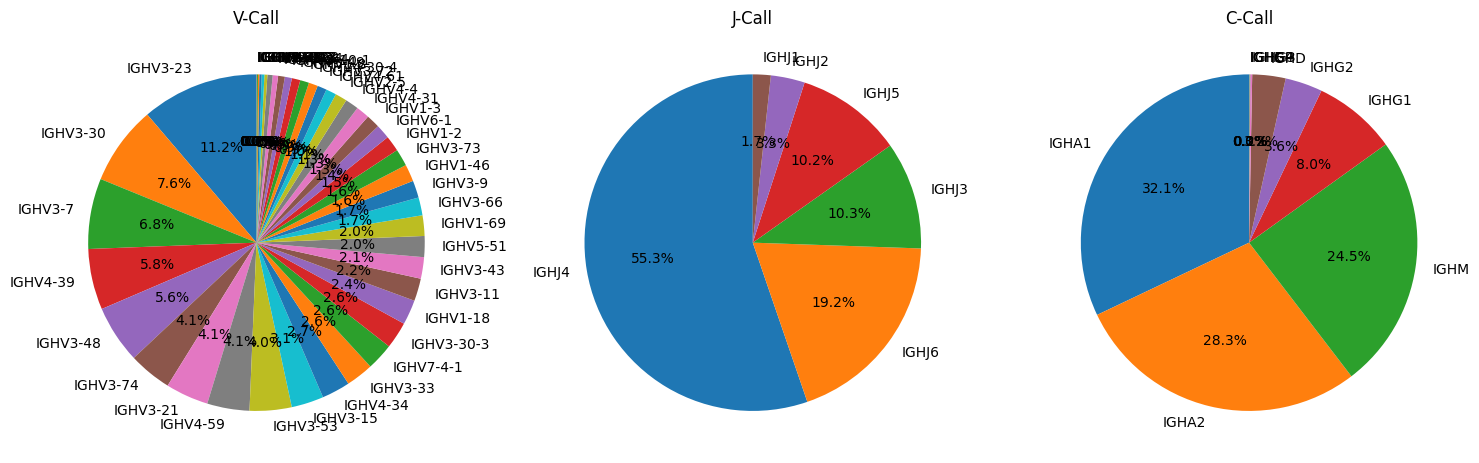

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(v_call.value_counts(), labels=v_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('V-Call')
axes[1].pie(j_call.value_counts(), labels=j_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('J-Call')
axes[2].pie(c_call.value_counts(), labels=c_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('C-Call')

plt.tight_layout()
plt.savefig('../Data/Example/pie_chart.png', dpi=300)

count    9132.000000
mean      298.831143
std        11.910628
min       246.000000
25%       291.000000
50%       298.000000
75%       307.000000
max       357.000000
Name: sequence_alignment, dtype: float64

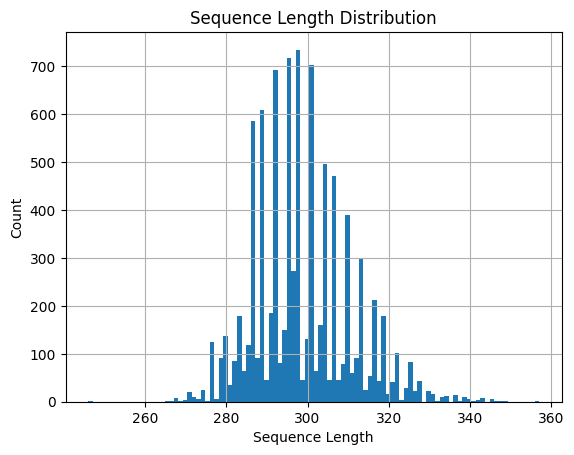

In [9]:
sequence_length = df['sequence_alignment'].str.len()
sequence_length.hist(bins=100)
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.savefig('../Data/Example/sequence_length.png', dpi=300)
sequence_length.describe()

count    9132.000000
mean       14.314936
std         3.702971
min         2.000000
25%        12.000000
50%        14.000000
75%        17.000000
max        29.000000
Name: cdr3_aa, dtype: float64

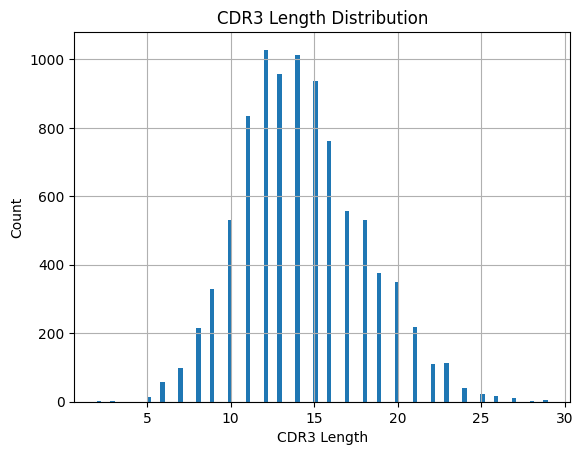

In [11]:
cdr3_length = df['cdr3_aa'].str.len()
cdr3_length.hist(bins=100)
plt.title('CDR3 Length Distribution')
plt.xlabel('CDR3 Length')
plt.ylabel('Count')
plt.savefig('../Data/Example/cdr3_length.png', dpi=300)
cdr3_length.describe()

In [29]:
def search_adjacency(grouped_dataframe):
    group_size = grouped_dataframe[0]
    sequence = grouped_dataframe[1]['cdr3_aa']
    id = grouped_dataframe[1]['sequence_id']
    hamming_distance_map = defaultdict(list)

    for i in range(len(sequence)):
        for j in range(i + 1, len(sequence)):
            hamming_distance = 0

            for k in range(group_size):
                if sequence.iloc[i][k] != sequence.iloc[j][k]:
                    hamming_distance += 1
                if hamming_distance > 1:
                    break
            if hamming_distance <= 1:
                hamming_distance_map[id.iloc[i]].append(id.iloc[j])
                hamming_distance_map[id.iloc[j]].append(id.iloc[i])

    return hamming_distance_map

def cluster_by_group(dataframe):

    sequence_length = dataframe['cdr3_aa'].str.len()
    grouped_dataframe = dataframe.groupby(sequence_length)
    grouped_dataframe = list(grouped_dataframe)

    grouped_hamming_distance_map = defaultdict(list)

    for i in range(len(grouped_dataframe)):
        grouped_hamming_distance_map[i] = search_adjacency(grouped_dataframe[i])

    return grouped_hamming_distance_map

grouped_cluster_map = cluster_by_group(df)

In [32]:
print(len(grouped_cluster_map))

27


In [33]:
import networkx as nx
G = nx.Graph()

for i in range (len(grouped_cluster_map)):
    for seq, neighbors in grouped_cluster_map[i].items():
        G.add_node(seq)
        for neighbor in neighbors:
            G.add_edge(seq, neighbor)


In [54]:
print(list(G.adj['Seq_3676']))
print(G.degree('Seq_3676'))


['Seq_1', 'Seq_3360', 'Seq_3710', 'Seq_3760', 'Seq_3965', 'Seq_4290', 'Seq_4514', 'Seq_4780', 'Seq_4815', 'Seq_5358', 'Seq_5549', 'Seq_5669', 'Seq_5843', 'Seq_5870', 'Seq_5982', 'Seq_6087', 'Seq_6097', 'Seq_6146', 'Seq_6368', 'Seq_6911', 'Seq_6954', 'Seq_6960', 'Seq_7049', 'Seq_7054', 'Seq_7246', 'Seq_7247', 'Seq_7278', 'Seq_7311', 'Seq_7312', 'Seq_7490', 'Seq_7600', 'Seq_7642', 'Seq_7718', 'Seq_8198', 'Seq_8560', 'Seq_8577', 'Seq_8656', 'Seq_8836', 'Seq_8954', 'Seq_8955']
40


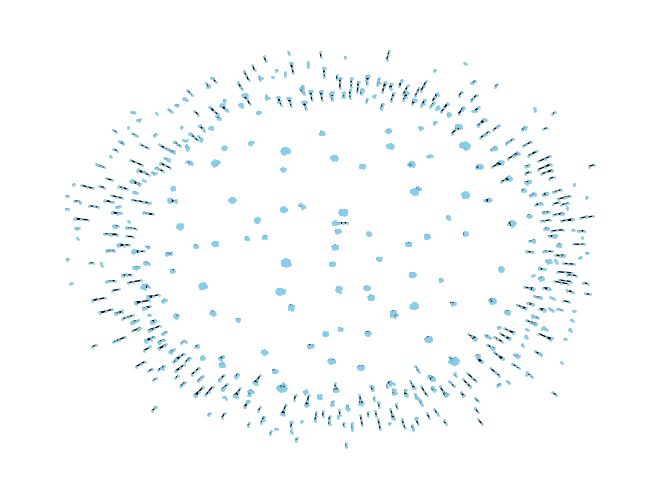

In [20]:
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels=False, node_size = 1, node_color = "skyblue", edge_color = 'black', font_size = 1)
plt.draw()
plt.savefig('../Data/Example/Cluster_Graph_without_label.png', dpi=1000)

In [427]:
clones = new_df.groupby(['v_call', 'j_call', 'cdr3_aa'])
clones = list(clones)

clones[1][0]


('IGHV1-18', 'IGHJ1', 'ARSPRSGYHQGYFQQ')

In [0]:
def check_for_CSR(dataframe):
    clones = dataframe.groupby(['v_call', 'j_call', 'cdr3_aa'])
    clones = list(clones)
    clones_with_CSR = []

    for i in range(len(clones)):
        isCSR, Cgenes = check_multiple_Cgene(clones[i][1])
        if isCSR:
            clones_with_CSR.append((clones[i][0], Cgenes))
    return clones_with_CSR

def check_multiple_Cgene(clone_dataframe):
    isCSR = clone_dataframe['c_call'].nunique()>1
    Cgenes = clone_dataframe['c_call'].unique()

    return isCSR, Cgenes

clones_with_CSR = check_for_CSR(new_df)

In [507]:
recombination_types = {}

for _, constant_genes in clones_with_CSR:
    unique_constant_genes = set(constant_genes)

    for combo in combinations(unique_constant_genes, 2):
        if 'IGHGP' in combo:
            continue

        if ('IGHA1' in combo and 'IGHA2' in combo) or ('IGHM' in combo and 'IGHD' in combo) or ('IGHG1' in combo and 'IGHG2' in combo):
            continue

        recombination_type = "-".join(sorted(combo))
        recombination_types[recombination_type] = recombination_types.get(recombination_type, 0) + 1

In [497]:
recombination_types.items()

dict_items([('IGHG2-IGHG3', 8), ('IGHA1-IGHG1', 17), ('IGHA2-IGHG1', 7), ('IGHA2-IGHG2', 16), ('IGHA1-IGHG2', 6), ('IGHA1-IGHM', 26), ('IGHA2-IGHM', 26), ('IGHA2-IGHG3', 2), ('IGHG2-IGHM', 1), ('IGHG1-IGHM', 4)])

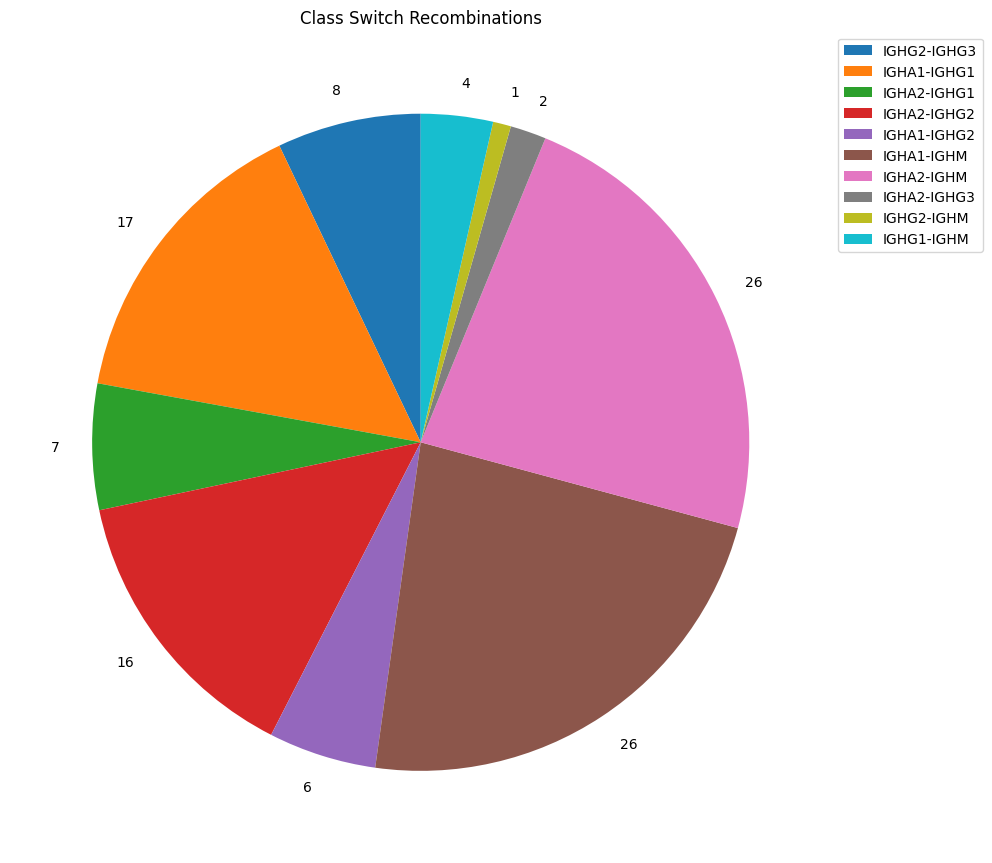

In [503]:
types = []
freq = []

for t, f in recombination_types.items():
    types.append(t)
    freq.append(f)

plt.figure(figsize = (10,10))
plt.pie(freq, labels = freq, startangle=90)
plt.legend(labels = types, loc = 'upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.title('Class Switch Recombinations')
plt.savefig('../Data/Example/CSR_types.png', dpi=300)
